Basic Multi-Layer Perceptron

In [20]:
# Kick off by importing libraries, and outlining the Iris dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler  
from sklearn.neural_network import MLPClassifier 
from sklearn.metrics import classification_report, confusion_matrix 

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

In [21]:
# Let's start by naming the features
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

In [22]:
# Reading the dataset through a Pandas function
irisdata = pd.read_csv(url, names=names)  

The Iris ataset has five columns. 
The task is to predict the class (which are the values in the fifth column) that the iris plant belongs to.

In [23]:
# Takes first 4 columns and assign them to variable "X"
X = irisdata.iloc[:, 0:4]
# Takes first 5th columns and assign them to variable "Y". Object dtype refers to strings.
y = irisdata.select_dtypes(include=[object])  

In [24]:
# Display the first lines DataFrame to visualize datas
X.head()

,sepal-length,sepal-width,petal-length,petal-width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [25]:
# Display the first lines DataFrame to visualize datas
y.head()

,Class
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


In [26]:
# y actually contains all categories or classes:
# Display unique class present in colunm Class
y.Class.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [27]:
# Now transforming categorial into numerical values
le = preprocessing.LabelEncoder()
# Apply encoder to y data to convert class to numerical values
y = y.apply(le.fit_transform)

In [28]:
# Display first line after transformation
y.head()

,Class
0,0
1,0
2,0
3,0
4,0


In [29]:
# Now for train and test split (80% of  dataset into  training set and  other 20% into test data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)  

In [30]:
# Feature scaling
scaler = StandardScaler()  
# Ajust scaler on train data
scaler.fit(X_train)
# Apply transformation on train data
X_train = scaler.transform(X_train)  
# Apply transformation on test data
X_test = scaler.transform(X_test)  

In [31]:
# Finally for the MLP- Multilayer Perceptron
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)  
mlp.fit(X_train, y_train.values.ravel())  

MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)

In [35]:
predictions = mlp.predict(X_test) 

In [37]:
print(predictions)

[0 1 0 0 0 1 2 2 2 0 2 2 2 1 2 1 2 2 1 2 0 1 1 1 1 2 2 1 1 0]


In [38]:
# Last thing: evaluation of algorithm performance in classifying flowers
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))  

[[ 7  0  0]
 [ 0  9  0]
 [ 0  2 12]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.82      1.00      0.90         9
           2       1.00      0.86      0.92        14

    accuracy                           0.93        30
   macro avg       0.94      0.95      0.94        30
weighted avg       0.95      0.93      0.93        30



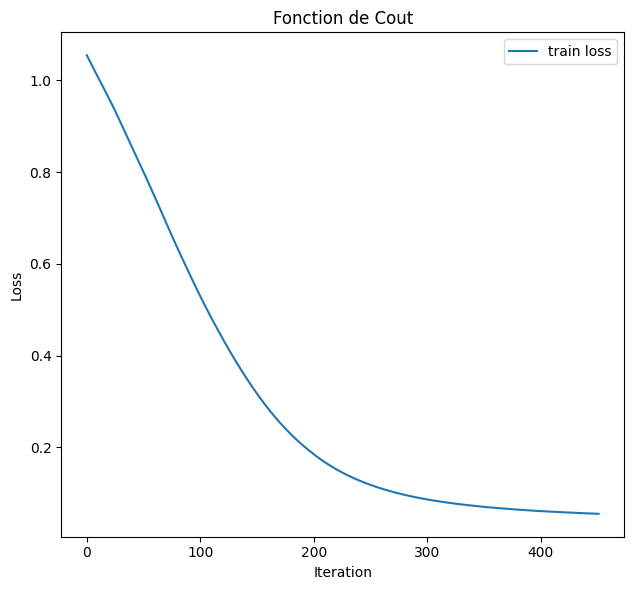

In [48]:
# Tracer la fonction de coût
loss_history = mlp.loss_curve_

# Tracer les courbes de perte et d'accuracy
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.plot(loss_history, label="train loss")
plt.title("Fonction de Cout")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()